# Project case - Boston Housing Data

Import the libraries we need for the lab

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

Read the dataset in the CSV file from the URL:

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

In [6]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [7]:
boston_df.drop(columns='Unnamed: 0',inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task: Generate basic statistics and visualizations for upper management.

#### Part 1: For the "Median value of owner-occupied homes" provide a boxplot

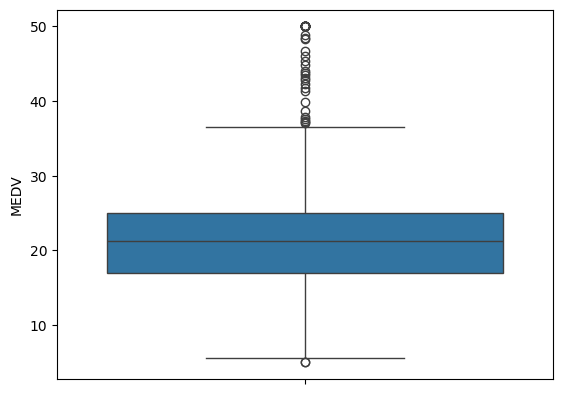

In [8]:
sns.boxplot(boston_df['MEDV'])
plt.show()

#### Part 2: Provide a bar plot for the Charles river variable

Text(0, 0.5, 'Count')

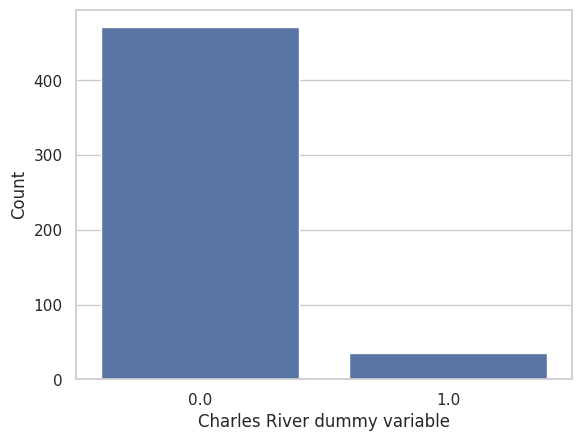

In [9]:
sns.set(style="whitegrid")
sns.barplot(x=boston_df['CHAS'].value_counts().index,y=boston_df['CHAS'].value_counts().values)
plt.xlabel('Charles River dummy variable')
plt.ylabel('Count')

#### Part 3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [10]:
#Define the function to categorize ages
def age_categry(age):
    if age <= 35:
        return '<=35'
    elif 36 <= age < 70:
        return '35-75'
    else:
        return '>=70'

In [11]:
boston_df['AGE_group'] = boston_df['AGE'].apply(age_categry)

<AxesSubplot:xlabel='AGE_group', ylabel='MEDV'>

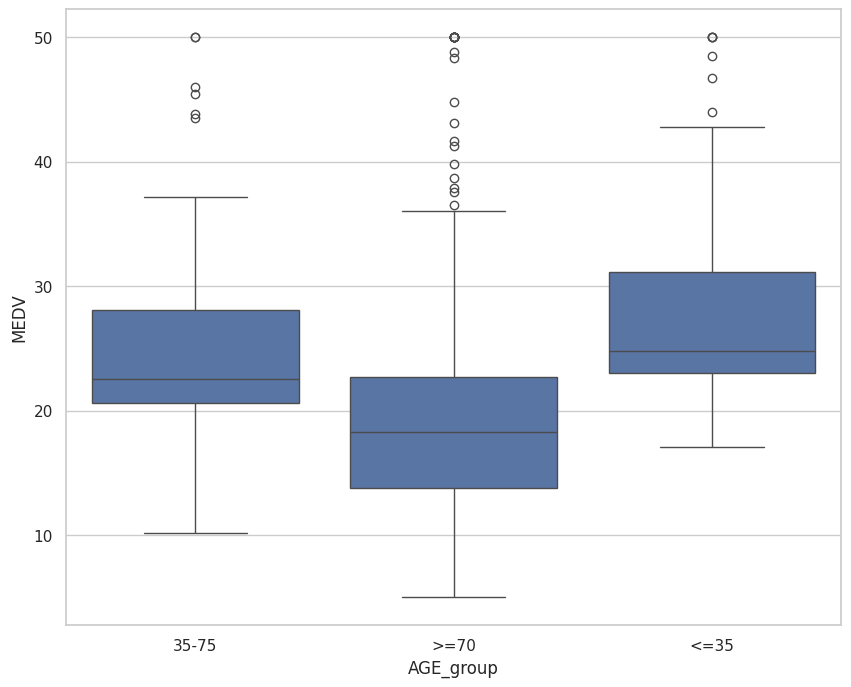

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x='AGE_group',y='MEDV',data=boston_df)

#### Part 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Nitric oxide concentrations')

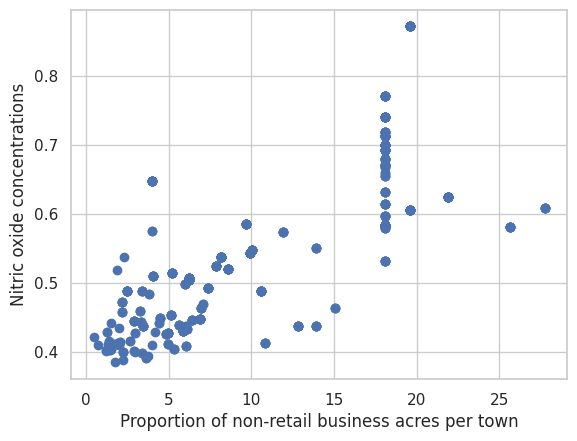

In [13]:
plt.scatter(boston_df['INDUS'],boston_df['NOX'])
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations')

#### Part 5: Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

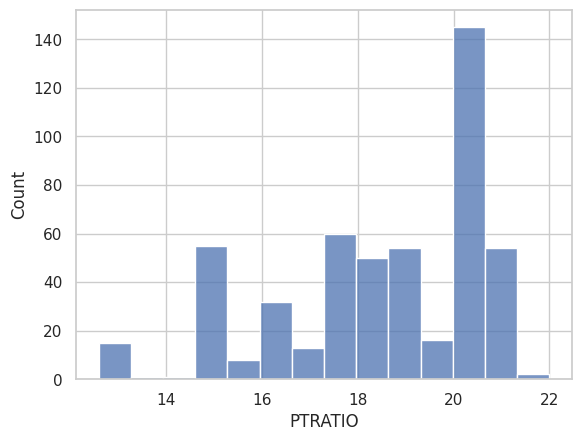

In [14]:
sns.histplot(boston_df['PTRATIO'])

# Task: Use the appropriate tests to answer the questions provided.
### Following criteria:
##### - State your hypotothesis
##### - Use α = 0.05
##### - Perform the test Statistics.
##### - State the conclusion from the test.

## Part 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### State the hypothesis
#### H0: =  there is no significant difference in median value of houses bounded by the Charles river
#### H1: =  there is a significant difference in median value of houses bounded by the Charles river

Text(0, 0.5, 'Count')

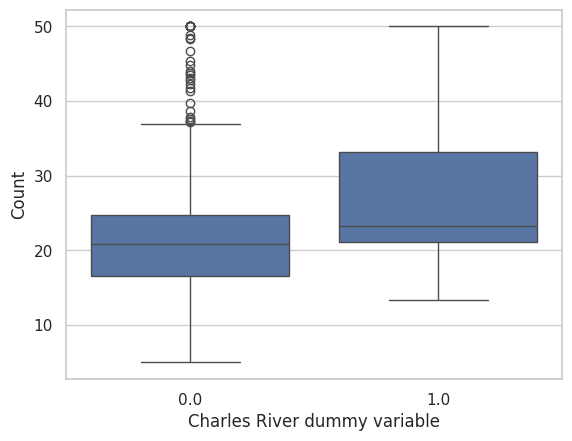

In [15]:
sns.set(style="whitegrid")
sns.boxplot(x='CHAS', y='MEDV',data=boston_df)
plt.xlabel('Charles River dummy variable')
plt.ylabel('Count')

In [16]:
#Reverted to original pre task of understanding data to understand "Charles River dummy variable (1 if tract bounds river; 0 otherwise)"
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],
                 boston_df[boston_df['CHAS']==0]['MEDV'], )


LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [17]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                   boston_df[boston_df['CHAS']==1]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

### Conclusion:
#### Since the p-value is greater than 0.05, we will reject the null hypothesis as there is significant evidence of difference The MEDV depend on whether its river_bound or river_unbound.

## Part 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### State the hypothesis
#### H0: =  there is no significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
#### H1: =  there is a significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [18]:
from scipy.stats import f_oneway

age_group1=boston_df[boston_df['AGE_group']=='35-75']['MEDV']
age_group2=boston_df[boston_df['AGE_group']=='>=70']['MEDV']
age_group3=boston_df[boston_df['AGE_group']=='<=35']['MEDV']

In [19]:
f_statistic, p_value = scipy.stats.f_oneway(age_group1, age_group2, age_group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.087505764984, P-Value: 2.2627978632350515e-15


### Conclusion:
#### Since the p-value is greater than 0.05, we will reject the null hypothesis as there is significant evidence of difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940

## Part 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### State the hypothesis
#### H0: =  there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
#### H1: =  there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [23]:
from scipy.stats import pearsonr
pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### Conclusion:
#### Since the p-value is greater than 0.05, we will reject the null hypothesis as there is significant evidence of a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

## Part 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### State the hypothesis
#### H0: =  there is a significant relationship additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#### H1: =  there is not significant relationship additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [24]:
X=boston_df['DIS']
Y=boston_df['MEDV']
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:28:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:
#### Since the p-value is less than 0.05, we accept the null hypothsis there is a significant relationship additional weighted distance to the five Boston employment centres on the median value of owner occupied homes